In [2]:
import pandas as pd
import numpy as np

In [3]:
#importing training csv file here 
path_train = input("Enter the path of the training data csv file : ")
train_peptide = pd.read_csv(path_train)
print(train_peptide.head(10))



Enter the path of the training data csv file : train.csv
               Sequence   Label
0    AAAFVNQHLCGSHLVEAL       0
1          AAAKEAEAHEEI       1
2       AAALPGQPESPDIPG       1
3         AAALPGQPPDIPG       1
4    AACFKEGSFDEDGFYAKV       0
5   AAEELMNALVNSTLLETRT       0
6         AAESSAKFKENSN       1
7         AAFMSENSTPNEP       1
8  AAGTAAGGKNFVIQKSEKSE       0
9  AAHCVANVNVRAVRVVLGAH       0


In [4]:
train_peptide.columns = train_peptide.columns.str.lstrip()

In [8]:
train_peptide

,Sequence,Label
0,AAAFVNQHLCGSHLVEAL,0
1,AAAKEAEAHEEI,1
2,AAALPGQPESPDIPG,1
3,AAALPGQPPDIPG,1
4,AACFKEGSFDEDGFYAKV,0
...,...,...
6388,YYLFEGFYFLQS,1
6389,YYLMDLSYSMKDDLWSI,1
6390,YYRKQLSPLEGGGWLVASG,0
6391,YYSLVTFGQGT,0


### Preprocessing

In [19]:
print("rows whose label is : 1 ",new_Data.loc[new_Data.Label==1].shape)
print("rows whose label is : 0 ",new_Data.loc[new_Data.Label==0].shape)

rows whose label is : 1  (3196, 22)
rows whose label is : 0  (3197, 22)


<AxesSubplot:>

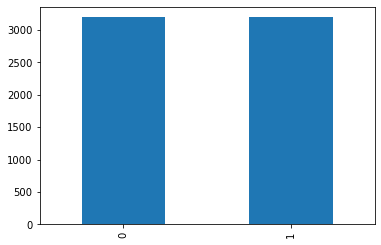

In [6]:
train_peptide['Label'].value_counts().sort_index().plot.bar()

In [9]:
#create new columns with the name of all posible characters in Protein Sequence
listofchar=["A","C","D","E","F","G","H","I","K","L","M","N","P","Q","R","S","T","V","W","Y"]
for list in listofchar:
    train_peptide[list] = ""
    

In [10]:
#populating these new columns based on the frequence of characters per sequence. So if A appears 4 time in a sequence,
# for that column A value will be 4 and so on

i=0
for index,row in train_peptide.iterrows():
    elements_count = {}
    for element in row["Sequence"]:
        if element in elements_count:
            elements_count[element] += 1
        else:
            elements_count[element] = 1
        
    for key, value in elements_count.items():
        for col in train_peptide.columns:
            #print(col)
            if col==key:
                train_peptide.loc[[i],col] = value
    i=i+1
        
    
      

In [11]:
# replace empty rows with 0 as that sequence doesn't appear 
train_peptide= train_peptide.replace(r'^\s*$', 0, regex=True)

In [12]:
train_peptide

,Sequence,Label,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,AAAFVNQHLCGSHLVEAL,0,4,1,0,1,1,1,2,0,...,0,1,0,1,0,1,0,2,0,0
1,AAAKEAEAHEEI,1,5,0,0,4,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,AAALPGQPESPDIPG,1,3,0,1,1,0,2,0,1,...,0,0,4,1,0,1,0,0,0,0
3,AAALPGQPPDIPG,1,3,0,1,0,0,2,0,1,...,0,0,4,1,0,0,0,0,0,0
4,AACFKEGSFDEDGFYAKV,0,3,1,2,2,3,2,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,YYLFEGFYFLQS,1,0,0,0,1,3,1,0,0,...,0,0,0,1,0,1,0,0,0,3
6389,YYLMDLSYSMKDDLWSI,1,0,0,3,0,0,0,0,1,...,2,0,0,0,0,3,0,0,1,3
6390,YYRKQLSPLEGGGWLVASG,0,1,0,0,1,0,4,0,0,...,0,0,1,1,1,2,0,1,1,2
6391,YYSLVTFGQGT,0,0,0,0,0,1,2,0,0,...,0,0,0,1,0,1,2,1,0,2


In [13]:
print("Training data shape :",train_peptide.shape)

Training data shape : (6393, 22)


In [14]:
train_peptide.describe()

,Label,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.00000,6393.000000,6393.000000,...,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000
mean,0.499922,1.043016,0.347411,0.987173,1.164086,0.619271,1.162678,0.36712,0.877053,1.058501,...,0.306429,0.914125,0.888941,0.734241,0.858126,1.214297,1.051463,0.979196,0.252933,0.578758
std,0.500039,1.175147,0.714305,1.036486,1.180573,0.825640,1.360815,0.64356,0.973954,1.165989,...,0.584626,1.061313,1.161218,0.964764,1.059134,1.223621,1.093849,1.059423,0.539145,0.796051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.00000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000
max,1.000000,10.000000,8.000000,8.000000,14.000000,5.000000,15.000000,5.00000,8.000000,10.000000,...,5.000000,8.000000,13.000000,25.000000,10.000000,10.000000,8.000000,7.000000,5.000000,5.000000


In [15]:
#checking if there is any null values
train_peptide.isnull().values.any()

False

In [16]:
#dropping null values to aviod any error further
train_peptide.dropna(inplace = True)

In [17]:
new_Data= train_peptide

In [93]:
print (new_Data)

                       Sequence  Label  A  C  D  E  F  G  H  I  ...  KLM  LMN  \
0            AAAFVNQHLCGSHLVEAL      0  1  1  0  1  1  1  2  0  ...    0    0   
1                  AAAKEAEAHEEI      1  1  0  0  4  0  0  1  1  ...    0    0   
2               AAALPGQPESPDIPG      1  1  0  1  1  0  2  0  1  ...    0    0   
3                 AAALPGQPPDIPG      1  1  0  1  0  0  2  0  1  ...    0    0   
4            AACFKEGSFDEDGFYAKV      0  3  1  2  2  3  2  0  0  ...    0    0   
...                         ...    ... .. .. .. .. .. .. .. ..  ...  ...  ...   
6388               YYLFEGFYFLQS      1  0  0  0  1  3  1  0  0  ...    0    0   
6389          YYLMDLSYSMKDDLWSI      1  0  0  3  0  0  0  0  1  ...    0    0   
6390        YYRKQLSPLEGGGWLVASG      0  1  0  0  1  0  4  0  0  ...    0    0   
6391                YYSLVTFGQGT      0  0  0  0  0  1  2  0  0  ...    0    0   
6392  YYSTPIEYFNKYSNGNKSVWCQANN      1  1  1  0  1  1  1  0  1  ...    0    0   

      MNP  NPQ  PQR  QRS  R

In [20]:
new_Data=new_Data.drop(['Sequence'], axis=1)
# we don't need Sequence moving forward to analyse

In [21]:
new_Data

,Label,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,0,4,1,0,1,1,1,2,0,0,...,0,1,0,1,0,1,0,2,0,0
1,1,5,0,0,4,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,1,1,0,2,0,1,0,...,0,0,4,1,0,1,0,0,0,0
3,1,3,0,1,0,0,2,0,1,0,...,0,0,4,1,0,0,0,0,0,0
4,0,3,1,2,2,3,2,0,0,2,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,1,0,0,0,1,3,1,0,0,0,...,0,0,0,1,0,1,0,0,0,3
6389,1,0,0,3,0,0,0,0,1,1,...,2,0,0,0,0,3,0,0,1,3
6390,0,1,0,0,1,0,4,0,0,1,...,0,0,1,1,1,2,0,1,1,2
6391,0,0,0,0,0,1,2,0,0,0,...,0,0,0,1,0,1,2,1,0,2


In [22]:
#lets us do the sampling 
Y= new_Data['Label']
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
X=new_Data.drop(['Label'], axis=1)

Original dataset shape Counter({0: 3197, 1: 3196})


In [23]:
#Train test split 
import random 
random.seed(10)
from sklearn.model_selection import train_test_split
#maintaining the data for the normal ascii values
nd_Xtrain, nd_Xtest, nd_Ytrain, nd_Ytest = train_test_split(X, Y,test_size=0.30, random_state=42)

In [26]:
import collections
collections.Counter(nd_Ytrain)

Counter({0: 2223, 1: 2252})

## Applying ML Algorithm, best output for SVM

In [27]:
#linear reg
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

logreg.fit(nd_Xtrain, nd_Ytrain)
print("Logistic Regression classifier accuracy : ",logreg.score(nd_Xtest, nd_Ytest))

Logistic Regression classifier accuracy :  0.7142857142857143


In [28]:
#lets run the classifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(random_state=39, max_features='auto', max_depth=5, splitter='best')
#decision tree classifier
dt.fit(nd_Xtrain, nd_Ytrain)
print("decision tree classifier accuracy : ",dt.score(nd_Xtest, nd_Ytest))

decision tree classifier accuracy :  0.6173096976016684


In [29]:
#Random forest on new_Data
rf = RandomForestClassifier(n_estimators=3)
rf.fit(nd_Xtrain, nd_Ytrain)
print("Random forest accuracy :",rf.score(nd_Xtest, nd_Ytest))

Random forest accuracy : 0.627215849843587


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(nd_Xtrain, nd_Ytrain)
print("Linear Discriminant accuracy :",lda.score(nd_Xtest, nd_Ytest))

Linear Discriminant accuracy : 0.7179353493222106


In [31]:
#SVM
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(nd_Xtrain, nd_Ytrain)
print("SVM accuracy :",clf.score(nd_Xtest, nd_Ytest))

SVM accuracy : 0.7184567257559958


In [38]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100, random_state=0)
adb.fit(nd_Xtrain, nd_Ytrain)
print("Ada Boost accuracy :",adb.score(nd_Xtest, nd_Ytest))

Ada Boost accuracy : 0.6986444212721585


C:\Users\namee\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


### SVM Hypertuning using grid search

In [33]:
from sklearn.metrics import classification_report, confusion_matrix  

In [34]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [35]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    #print("Evaluation:", kernals[i], "kernel")
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       651
           1       0.60      0.75      0.67       628

    accuracy                           0.64      1279
   macro avg       0.65      0.64      0.63      1279
weighted avg       0.65      0.64      0.63      1279

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       669
           1       0.66      0.75      0.70       610

    accuracy                           0.70      1279
   macro avg       0.70      0.70      0.70      1279
weighted avg       0.70      0.70      0.70      1279

              precision    recall  f1-score   support

           0       0.54      0.49      0.51       674
           1       0.49      0.54      0.51       605

    accuracy                           0.51      1279
   macro avg       0.51      0.51      0.51      1279
weighted avg       0.52      0.51      0.51      1279

              preci

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform

## trying some combinations of parameters and trying to  get the best for the data

# defining param'C'eter range
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}






grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 5)

# fitting the model for grid search
grid.fit(nd_Xtest, nd_Ytest)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.509 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.620 total time=   1.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.656 total time=   0.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.630 total time=   0.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.598 total time=   1.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.559 total time=   0.6s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.508 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 4/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.736 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.719 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.702 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.726 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.508 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.508 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.508 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.507 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.509 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.

[CV 4/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.679 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.381 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.693 total time=   0.1s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.2s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.674 total time=   0.2s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.705 total time=   0.2s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.679 total time=   0.2s
[CV 1/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.672 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.680 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.677 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.705 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.689 total time=   0.0s
[CV 1/5] END .C=100, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=5)

In [37]:
print("SVM accuracy using Hypertuning :",grid.score(nd_Xtest, nd_Ytest))

SVM accuracy using Hypertuning : 0.7236704900938478


### Test data processing

In [39]:
#Now lets us import the test data 
#importing testing csv file here 
path_Test = input("Enter the path of the testing data csv file : ")
test_peptide = pd.read_csv(path_Test)
print(test_peptide.head(10))
print(test_peptide.shape)
test=pd.read_csv('test.csv')

Enter the path of the testing data csv file : test.csv
      ID               Sequence
0  10001      AAAEQLKTTRNAYHQKY
1  10002       AAALAPTQTRAGPHSL
2  10003           AADLALATVNEL
3  10004  AAHPDKRGEDQAEGLPEEVRG
4  10005   AAKPKRAKASKKSTDHPKYS
5  10006            AALVLASVTYP
6  10007           AATAFVGAGLAG
7  10008            AAVNGPRSVVV
8  10009           ACKRANVNDFFN
9  10010           ACKRFEELGVQF
(1598, 2)


In [40]:
#create new columnstt
listofchar=["A","C","D","E","F","G","H","I","K","L","M","N","P","Q","R","S","T","V","W","Y"]
for list in listofchar:
    test_peptide[list] = ""
    

In [41]:
#populate these new columns
i=0
for index,row in test_peptide.iterrows():
    elements_count = {}
    for element in row[" Sequence"]:
        if element in elements_count:
            elements_count[element] += 1
        else:
            elements_count[element] = 1
        
    for key, value in elements_count.items():
        for col in test_peptide.columns:
            #print(col)
            if col==key:
                test_peptide.loc[[i],col] = value
    i=i+1
        
    
      

In [42]:
test_peptide= test_peptide.replace(r'^\s*$', 0, regex=True)

In [43]:
test_Data = test_peptide

In [44]:
test_Data=test_Data.drop([' Sequence'], axis=1)

In [45]:
test_Data

,ID,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,10001,4,0,0,1,0,0,1,0,2,...,0,1,0,2,1,0,2,0,0,2
1,10002,5,0,0,0,0,1,1,0,0,...,0,0,2,1,1,1,2,0,0,0
2,10003,4,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,10004,3,0,2,4,0,3,1,0,1,...,0,0,2,1,2,0,0,1,0,0
4,10005,4,0,1,0,0,0,1,0,6,...,0,0,2,0,1,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,11594,0,0,2,1,0,2,2,1,1,...,0,1,0,0,0,3,0,1,1,3
1594,11595,0,2,3,0,1,0,0,0,0,...,0,1,2,1,0,0,0,1,1,1
1595,11596,1,1,2,0,1,2,1,0,2,...,0,0,0,0,0,1,1,0,0,3
1596,11597,0,0,0,1,1,0,0,0,3,...,0,2,1,0,1,0,0,3,0,2


In [46]:
test_Data_to_pred=test_Data.drop(['ID'], axis=1)

In [47]:
#predicting the values of test_Data in the best model 
#Decision tree
y_val_dt =  dt.predict(test_Data_to_pred.values) 
#Random forest
y_val_rf =  rf.predict(test_Data_to_pred.values) 
#Log reg
log_reg=logreg.predict(test_Data_to_pred.values)

svm=clf.predict(test_Data_to_pred.values)

grid_svm=grid.predict(test_Data_to_pred.values)

C:\Users\namee\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\namee\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\namee\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\namee\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\namee\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [54]:
import collections, numpy
print("RF- "+ str(collections.Counter(y_val_rf)))
print("DT- "+ str(collections.Counter(y_val_dt)))
print("LogReg- "+ str(collections.Counter(log_reg)))
print("SVM- "+ str(collections.Counter(svm)))
print("GRID_SVM- "+ str(collections.Counter(grid_svm)))




RF- Counter({1: 862, 0: 736})
DT- Counter({1: 1072, 0: 526})
LogReg- Counter({1: 938, 0: 660})
SVM- Counter({1: 918, 0: 680})
GRID_SVM- Counter({1: 976, 0: 622})


In [55]:
see1 = test.copy(deep=True)
see2 = test.copy(deep=True)
see3 =test.copy(deep=True)
see4 = test.copy(deep=True)
see5=test.copy(deep=True)

In [56]:

see1['Label'] = y_val_dt
see2['Label'] = y_val_rf
see3['Label'] = log_reg
see4['Label'] = svm
see5['Label'] = grid_svm

In [ ]:
#see1=see1.rename(columns={'Sequence' : 'Label'})
#see2=see2.rename(columns={'Sequence' : 'Label'})



In [57]:
see1.drop(' Sequence',axis=1,inplace=True)

see2.drop(' Sequence',axis=1,inplace=True)

see4.drop(' Sequence',axis=1,inplace=True)

see3.drop(' Sequence',axis=1,inplace=True)

see5.drop(' Sequence',axis=1,inplace=True)


In [58]:
see1.to_csv('try1_dt.csv', index=False)
see2.to_csv('try1_rf.csv', index=False)
see3.to_csv('try1_log_reg.csv', index=False)
see5.to_csv('try1_grid_svm.csv',index=False)
see4.to_csv('try1_svm.csv',index=False)

In [59]:
see1['Label'].value_counts()

1    1072
0     526
Name: Label, dtype: int64

In [60]:
see2['Label'].value_counts()

1    862
0    736
Name: Label, dtype: int64

In [61]:
see3['Label'].value_counts()

1    938
0    660
Name: Label, dtype: int64

In [63]:
see4['Label'].value_counts()

1    918
0    680
Name: Label, dtype: int64

In [64]:
see5['Label'].value_counts()

1    976
0    622
Name: Label, dtype: int64